<a href="https://colab.research.google.com/github/karamalzubi/Google-Colab/blob/main/Customer_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/Social_Network_Ads (Assignment 1).csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [16]:
df.drop('User ID', axis = 1 , inplace=True)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [17]:
df.isnull().sum().sum()

np.int64(0)

In [18]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [19]:
#df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

In [20]:
df.head()
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


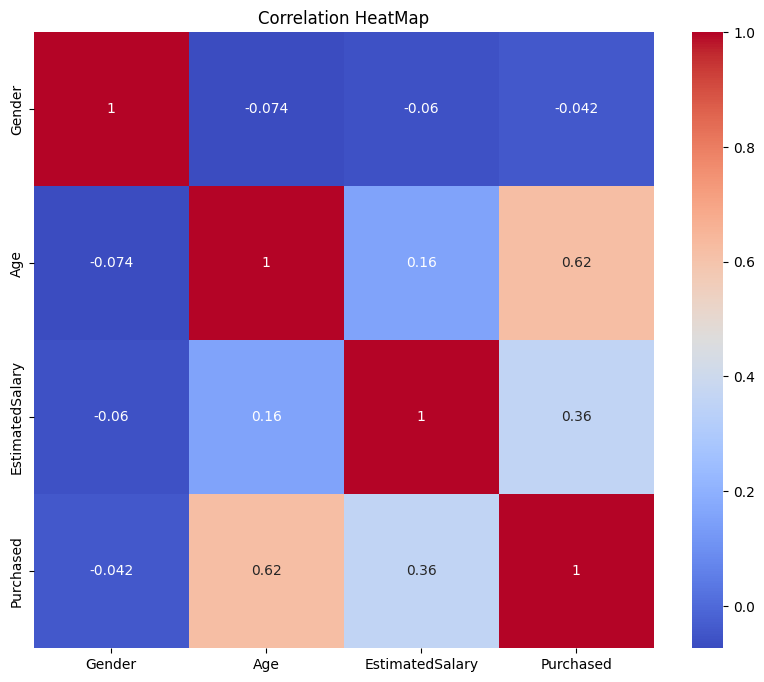

In [21]:
# It is better to visualize the correlation using HeatMap visual.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation HeatMap')
plt.show()

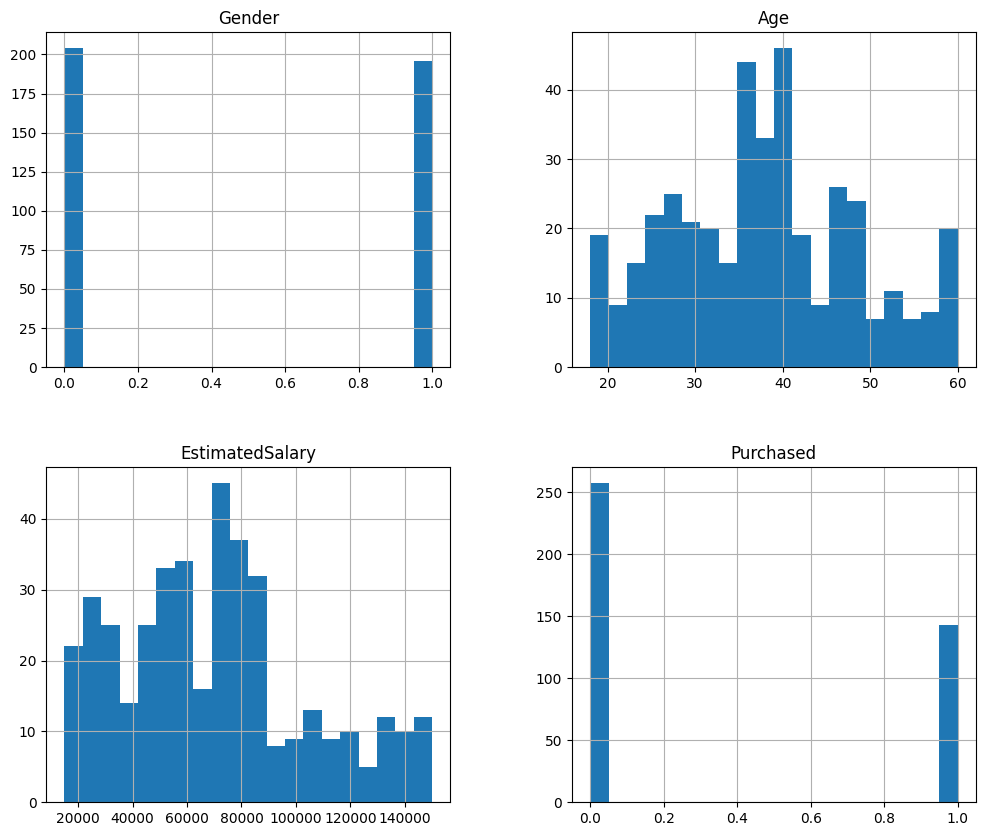

In [22]:
# Use hoistograms to identify OutLiers.

df.hist(figsize=(12,10), bins=20)
plt.show()

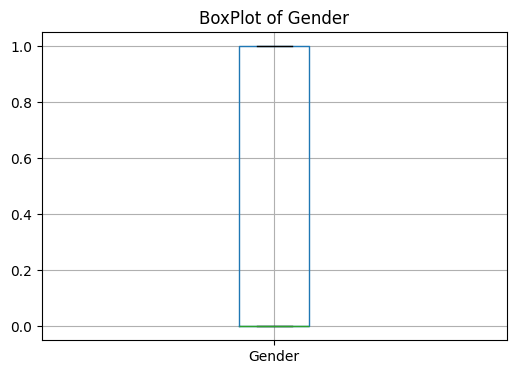

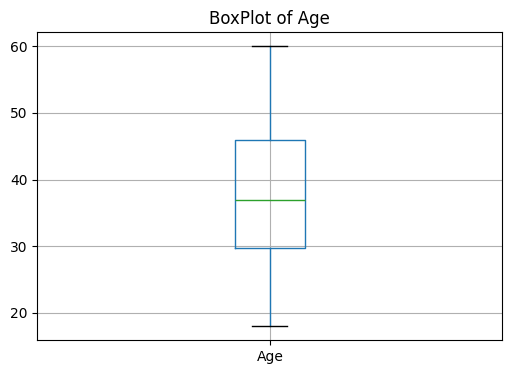

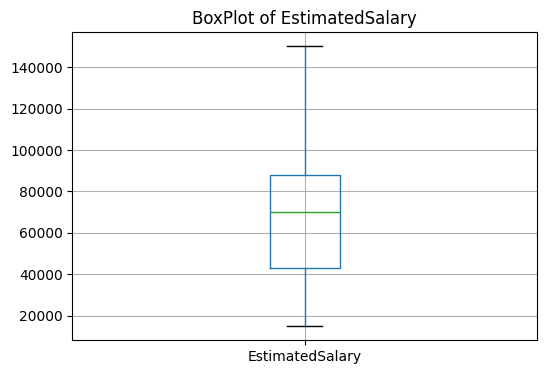

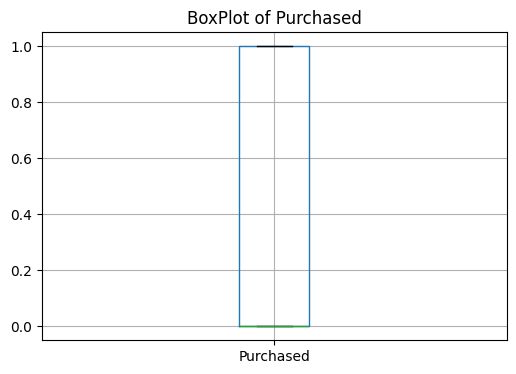

In [23]:
# BoxPlot can assist in understanding Data Distribution and identifying OulLiers

for column in df.columns:
  plt.figure(figsize = (6,4))
  df.boxplot(column=column)
  plt.title(f'BoxPlot of {column}')
  plt.show()


Model Building

In [24]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [26]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

recall_score=recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)


print("Recall Score:", recall_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("\nConfusion Matrix:\n", cm)

Recall Score: 0.75
Accuracy: 0.8875
Precision: 0.9130434782608695

Confusion Matrix:
 [[50  2]
 [ 7 21]]


In [27]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

recall_score=recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)


print("Recall Score:", recall_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("\nConfusion Matrix:\n", cm)

TypeError: 'float' object is not callable